# DEFINICIÓN DE PARÁMETROS

In [1]:
#######################################################################################################################

# Ruta hacia los CSV del dataset
train_file_relative = './data/700Train.csv'
validation_file_relative = './data/700Validation.csv'
test_file_relative = './data/700Test.csv'

# Ruta al directorio de imágenes con máscara aplicada
masked_dir_relative = '../local/output_masked'
edited_dir_relative = '../local/output_edited'

model_dir_relative = "./models"

# Ruta relativa hacia la librería ai4eutils
ai4eutils_relative = "./repos/ai4eutils"

# Ruta relativa hacia la librería CameraTraps
CameraTraps_relative = "./repos/CameraTraps"

#######################################################################################################################

# DEFINICIÓN PARÁMETROS CNN

In [2]:
#######################################################################################################################

IMG_HEIGHT = IMG_WEIGHT = 500
EPOCHS = 15
BATCH_SIZE = 16

#######################################################################################################################

In [3]:
import os
import platform

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras

from modules.dataset_utils import DatasetUtils

home = os.path.expanduser("~")

ai4utils = os.path.abspath(ai4eutils_relative)
CameraTraps = os.path.abspath(CameraTraps_relative)
train_file = os.path.abspath(train_file_relative)
validation_file = os.path.abspath(validation_file_relative)
test_file = os.path.abspath(test_file_relative)
masked_dir = os.path.abspath(masked_dir_relative)
edited_dir = os.path.abspath(edited_dir_relative)
model_dir = os.path.abspath(model_dir_relative)

try:
    os.environ['PYTHONPATH']
except KeyError:
    os.environ['PYTHONPATH'] = ""
if platform.system() == 'Windows':
    os.environ['PYTHONPATH'] += (";" + ai4utils)
    os.environ['PYTHONPATH'] += (";" + CameraTraps)
else:
    os.environ['PYTHONPATH'] += (":" + ai4utils)
    os.environ['PYTHONPATH'] += (":" + CameraTraps)

print('==============================================================================================================')
print('PYTHONPATH: ' + os.environ['PYTHONPATH'])
print('')
print('ai4eutils PATH: ' + '\t\t' + ai4utils)
print('CameraTraps PATH: ' + '\t\t' + CameraTraps)
print('Train CSV PATH: ' + '\t\t' + train_file)
print('Validation CSV PATH: ' + '\t' + validation_file)
print('Test CSV PATH: ' + '\t\t\t' + test_file)
print('masked PATH: ' + '\t\t\t' + masked_dir)
print('edited PATH: ' + '\t\t\t' + edited_dir)
print('models PATH: ' + '\t\t\t' + model_dir)
print('==============================================================================================================')


TensorFlow version: 2.10.0
Is GPU available? tf.test.is_gpu_available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

PYTHONPATH: /Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo:/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils:/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps

ai4eutils PATH: 		/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils
CameraTraps PATH: 		/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps
Train CSV PATH: 		/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/data/700Train.csv
Validation CSV PATH: 	/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/data/700Validation.csv
Test CSV PATH: 			/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/data/700Test.csv
masked PATH: 			/Users/carlos/WORKSPACE/local/output_masked
edited PATH: 			/Users/carlos/WORKSPACE/local/output_edited
models PATH: 			/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/models


# ALEXNET original architecture with image size 224x224

In [4]:
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================

Metal device set to: Apple M1


2022-10-11 13:44:26.559971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-11 13:44:26.560055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
AlexNet_OG_224_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_OG_224_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])

AlexNet_OG_224_edited = tf.keras.models.clone_model(AlexNet_OG_224_masked, input_tensors=None, clone_function=None)
AlexNet_OG_224_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])

Epoch 1/15


2022-10-11 13:44:27.543361: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-11 13:44:27.543820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.5137 - accuracy: 0.8310

2022-10-11 13:44:44.768385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 19s 162ms/step - loss: 1.5137 - accuracy: 0.8310 - val_loss: 0.6499 - val_accuracy: 0.6603
Epoch 2/15
91/91 [==============================] - 18s 155ms/step - loss: 0.7396 - accuracy: 0.8545 - val_loss: 1.4357 - val_accuracy: 0.6603
Epoch 3/15
91/91 [==============================] - 18s 155ms/step - loss: 0.4355 - accuracy: 0.8814 - val_loss: 2.1824 - val_accuracy: 0.6603
Epoch 4/15
91/91 [==============================] - 17s 155ms/step - loss: 0.4187 - accuracy: 0.8786 - val_loss: 2.1198 - val_accuracy: 0.6603
Epoch 5/15
91/91 [==============================] - 17s 156ms/step - loss: 0.3146 - accuracy: 0.9014 - val_loss: 2.5473 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 17s 155ms/step - loss: 0.2515 - accuracy: 0.9090 - val_loss: 1.8521 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 17s 155ms/step - loss: 0.2661 - accuracy: 0.9090 - val_loss: 0.2746 - val_accuracy: 0.9423
Epoch 8/15

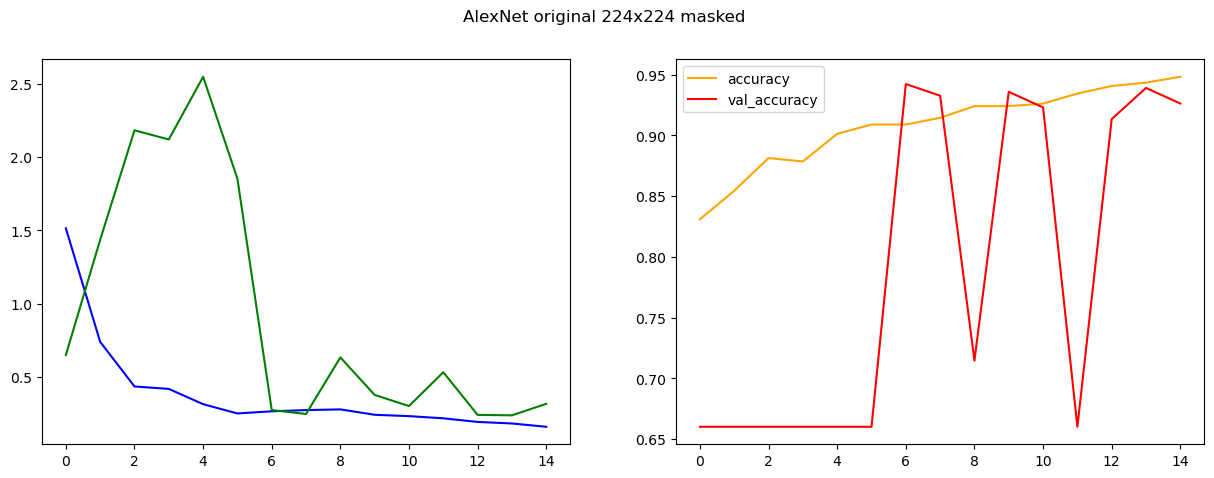

In [6]:
hist = AlexNet_OG_224_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_224_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet original 224x224 masked')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()

Epoch 1/15


2022-10-11 13:48:52.618408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.4379 - accuracy: 0.8007

2022-10-11 13:49:07.261342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 16s 152ms/step - loss: 1.4379 - accuracy: 0.8007 - val_loss: 1.0454 - val_accuracy: 0.6603
Epoch 2/15
91/91 [==============================] - 15s 149ms/step - loss: 0.7705 - accuracy: 0.8248 - val_loss: 1.0812 - val_accuracy: 0.6603
Epoch 3/15
91/91 [==============================] - 15s 150ms/step - loss: 0.5504 - accuracy: 0.8297 - val_loss: 1.2978 - val_accuracy: 0.6603
Epoch 4/15
91/91 [==============================] - 15s 149ms/step - loss: 0.5359 - accuracy: 0.8428 - val_loss: 0.8642 - val_accuracy: 0.6603
Epoch 5/15
91/91 [==============================] - 15s 150ms/step - loss: 0.4817 - accuracy: 0.8455 - val_loss: 0.8108 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 15s 150ms/step - loss: 0.3946 - accuracy: 0.8676 - val_loss: 0.4488 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 15s 150ms/step - loss: 0.4094 - accuracy: 0.8655 - val_loss: 0.8607 - val_accuracy: 0.6603
Epoch 8/15

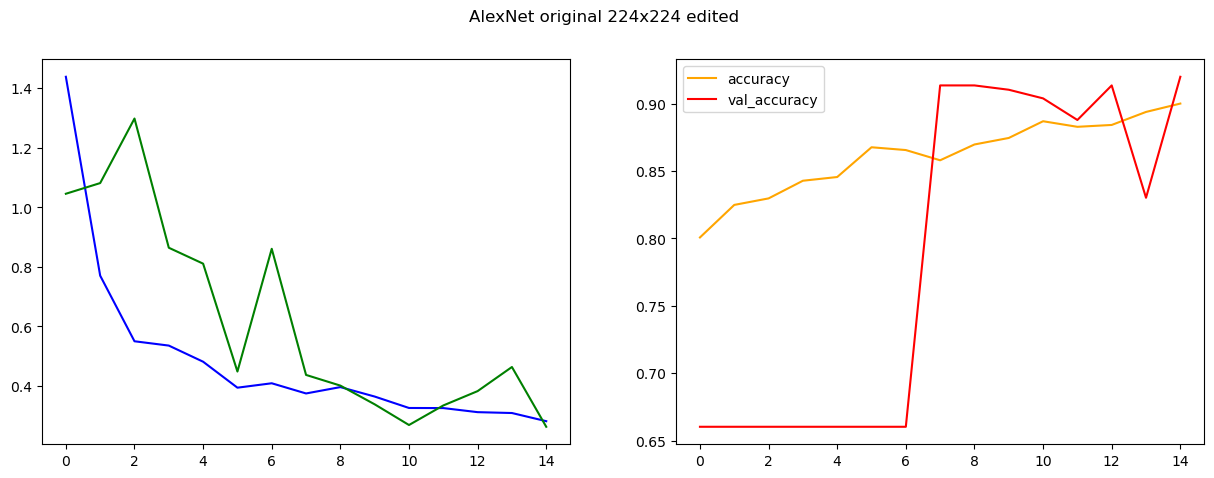

In [7]:
hist = AlexNet_OG_224_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_224_edited.evaluate(test_dataset_edited, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet original 224x224 edited')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()

# ALEXNET original architecture with image size 448x448

In [8]:
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================

In [9]:
AlexNet_OG_448_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(448, 448, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_OG_448_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])

AlexNet_OG_448_edited = tf.keras.models.clone_model(AlexNet_OG_448_masked, input_tensors=None, clone_function=None)
AlexNet_OG_448_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])

Epoch 1/15


2022-10-11 13:52:45.281446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.4945 - accuracy: 0.8352

2022-10-11 13:53:45.753897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 64s 641ms/step - loss: 1.4945 - accuracy: 0.8352 - val_loss: 0.7779 - val_accuracy: 0.6603
Epoch 2/15
91/91 [==============================] - 66s 659ms/step - loss: 1.1064 - accuracy: 0.8621 - val_loss: 6.1439 - val_accuracy: 0.6603
Epoch 3/15
91/91 [==============================] - 65s 653ms/step - loss: 0.9157 - accuracy: 0.8738 - val_loss: 4.0960 - val_accuracy: 0.6603
Epoch 4/15
91/91 [==============================] - 65s 653ms/step - loss: 0.7590 - accuracy: 0.8814 - val_loss: 5.9544 - val_accuracy: 0.6603
Epoch 5/15
91/91 [==============================] - 65s 651ms/step - loss: 0.4334 - accuracy: 0.8993 - val_loss: 4.9858 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 64s 649ms/step - loss: 0.4908 - accuracy: 0.8966 - val_loss: 6.6472 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 65s 656ms/step - loss: 0.4159 - accuracy: 0.9069 - val_loss: 4.1663 - val_accuracy: 0.6603
Epoch 8/15

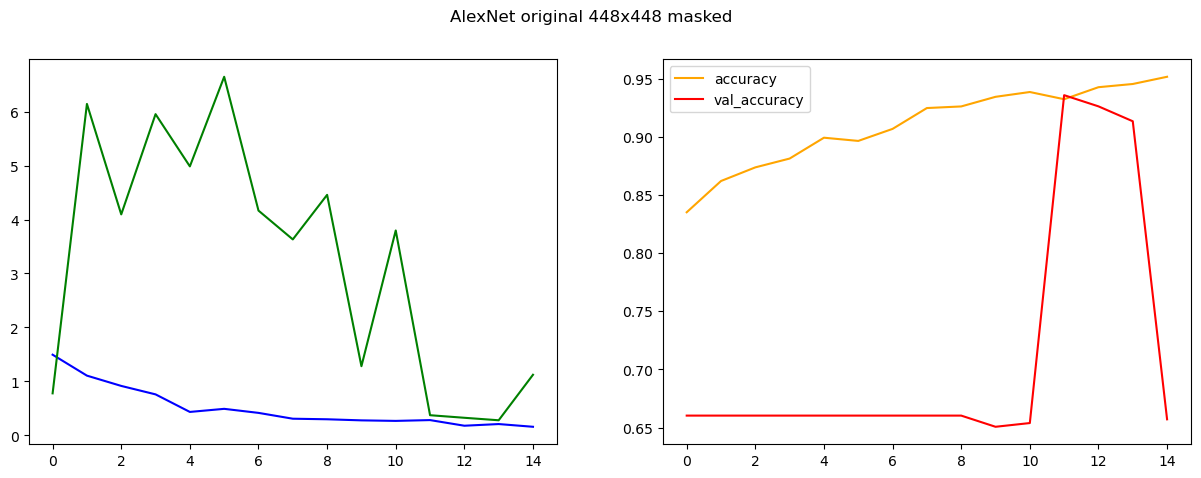

In [10]:
hist = AlexNet_OG_448_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_448_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet original 448x448 masked')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()

Epoch 1/15


2022-10-11 14:09:00.906115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.6253 - accuracy: 0.7993

2022-10-11 14:10:01.400701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 64s 661ms/step - loss: 1.6253 - accuracy: 0.7993 - val_loss: 0.6681 - val_accuracy: 0.6603
Epoch 2/15
91/91 [==============================] - 63s 661ms/step - loss: 1.4081 - accuracy: 0.8097 - val_loss: 1.5293 - val_accuracy: 0.6603
Epoch 3/15
91/91 [==============================] - 63s 660ms/step - loss: 1.1539 - accuracy: 0.8207 - val_loss: 0.8344 - val_accuracy: 0.6603
Epoch 4/15
91/91 [==============================] - 63s 659ms/step - loss: 0.7513 - accuracy: 0.8331 - val_loss: 1.5860 - val_accuracy: 0.6603
Epoch 5/15
91/91 [==============================] - 63s 661ms/step - loss: 0.5905 - accuracy: 0.8483 - val_loss: 1.5105 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 63s 661ms/step - loss: 0.5764 - accuracy: 0.8510 - val_loss: 1.3837 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 63s 661ms/step - loss: 0.5568 - accuracy: 0.8407 - val_loss: 1.1647 - val_accuracy: 0.6603
Epoch 8/15

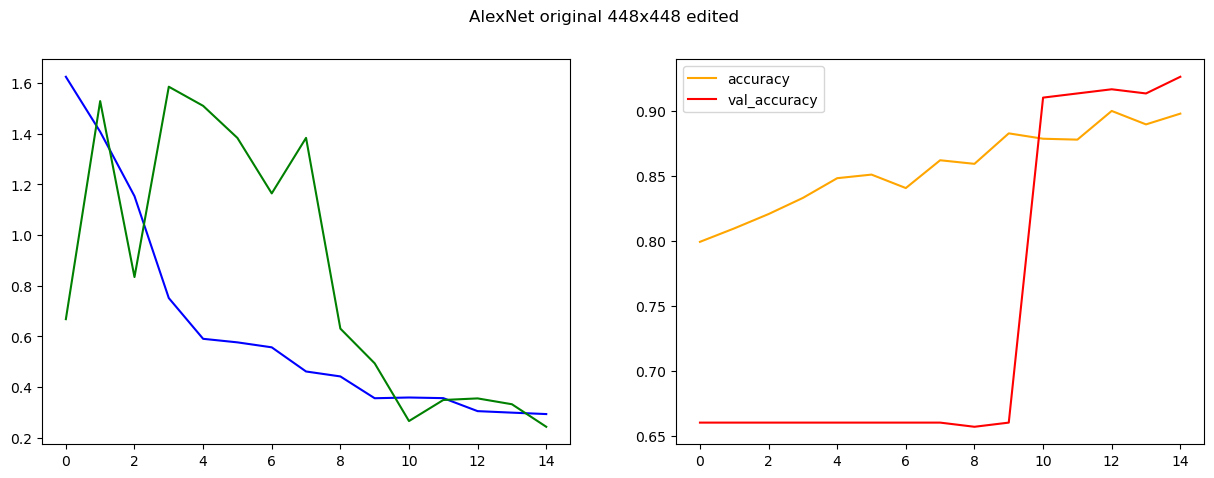

In [11]:
hist = AlexNet_OG_448_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_448_edited.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet original 448x448 edited')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()

# ALEXNET modification architecture with image size 224x224

In [12]:
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================

In [13]:
AlexNet_MOD_224_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_MOD_224_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

AlexNet_MOD_224_edited = tf.keras.models.clone_model(AlexNet_MOD_224_masked, input_tensors=None, clone_function=None)
AlexNet_MOD_224_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

Epoch 1/15


2022-10-11 14:24:52.026145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 0.7250 - accuracy: 0.8462

2022-10-11 14:25:00.976754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 11s 70ms/step - loss: 0.7250 - accuracy: 0.8462 - val_loss: 1.1895 - val_accuracy: 0.3397
Epoch 2/15
91/91 [==============================] - 9s 64ms/step - loss: 0.5086 - accuracy: 0.8731 - val_loss: 0.9548 - val_accuracy: 0.3397
Epoch 3/15
91/91 [==============================] - 9s 64ms/step - loss: 0.4318 - accuracy: 0.8834 - val_loss: 0.6750 - val_accuracy: 0.5641
Epoch 4/15
91/91 [==============================] - 9s 64ms/step - loss: 0.3081 - accuracy: 0.8986 - val_loss: 0.5662 - val_accuracy: 0.6603
Epoch 5/15
91/91 [==============================] - 9s 64ms/step - loss: 0.3267 - accuracy: 0.9048 - val_loss: 0.5909 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 9s 64ms/step - loss: 0.2688 - accuracy: 0.9152 - val_loss: 0.8515 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 9s 64ms/step - loss: 0.2472 - accuracy: 0.9241 - val_loss: 0.8979 - val_accuracy: 0.6603
Epoch 8/15
91/91 [=====

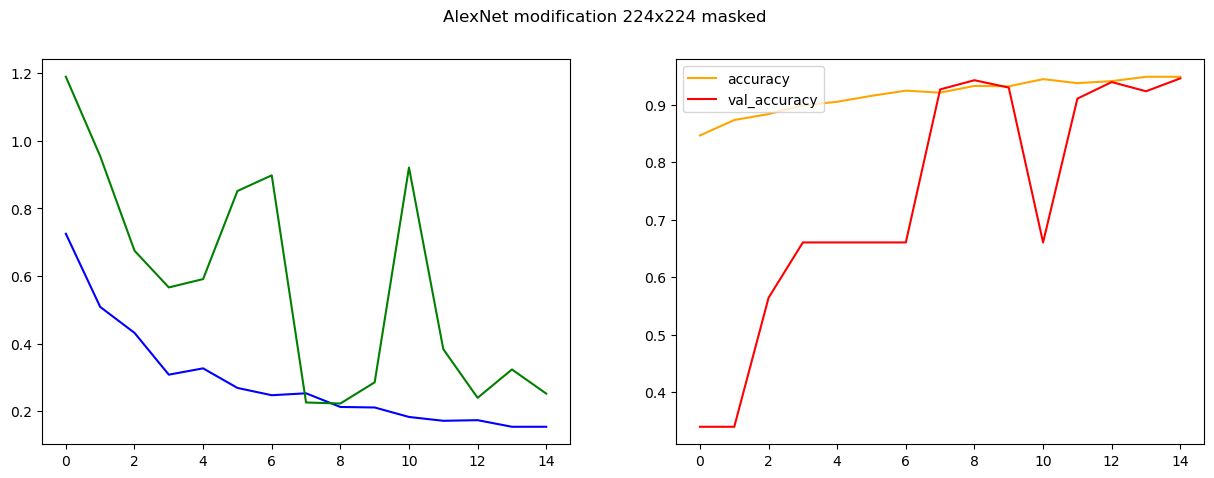

In [14]:
hist = AlexNet_MOD_224_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_224_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet modification 224x224 masked')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()

Epoch 1/15


2022-10-11 14:27:11.427345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 0.8431 - accuracy: 0.8179

2022-10-11 14:27:18.350903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 8s 64ms/step - loss: 0.8431 - accuracy: 0.8179 - val_loss: 0.9624 - val_accuracy: 0.3397
Epoch 2/15
91/91 [==============================] - 7s 61ms/step - loss: 0.5566 - accuracy: 0.8497 - val_loss: 1.1579 - val_accuracy: 0.3397
Epoch 3/15
91/91 [==============================] - 7s 61ms/step - loss: 0.4912 - accuracy: 0.8469 - val_loss: 0.6268 - val_accuracy: 0.6603
Epoch 4/15
91/91 [==============================] - 7s 61ms/step - loss: 0.4505 - accuracy: 0.8579 - val_loss: 0.6169 - val_accuracy: 0.6603
Epoch 5/15
91/91 [==============================] - 7s 60ms/step - loss: 0.4002 - accuracy: 0.8634 - val_loss: 0.6222 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 7s 60ms/step - loss: 0.3704 - accuracy: 0.8731 - val_loss: 0.8195 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 7s 60ms/step - loss: 0.3471 - accuracy: 0.8814 - val_loss: 0.7683 - val_accuracy: 0.6603
Epoch 8/15
91/91 [======

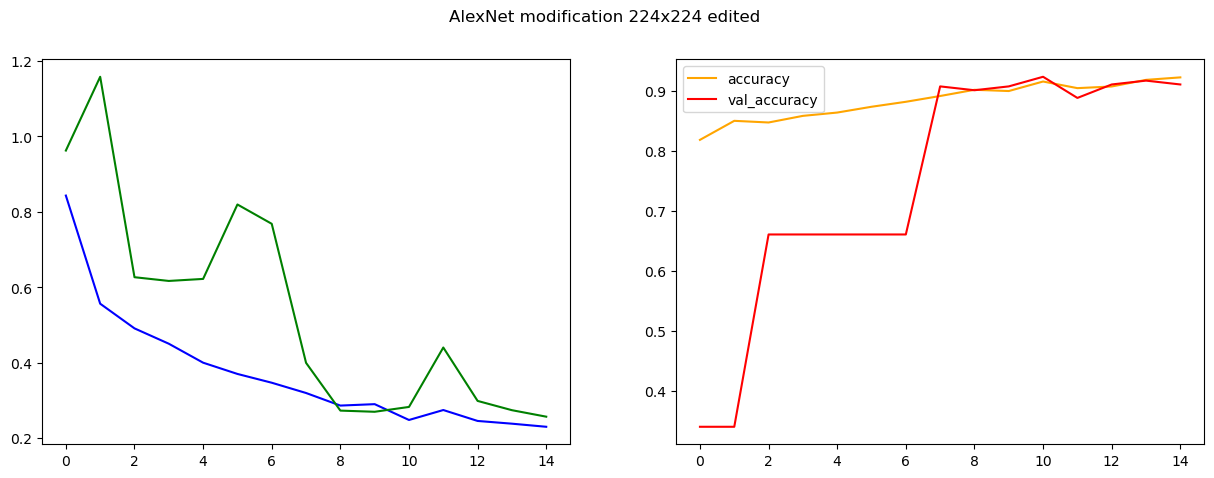

In [15]:
hist = AlexNet_MOD_224_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_224_edited.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet modification 224x224 edited')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()

# ALEXNET modification architecture with image size 448x448

In [16]:
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================

In [17]:
AlexNet_MOD_448_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(448, 448, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_MOD_448_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

AlexNet_MOD_448_edited = tf.keras.models.clone_model(AlexNet_MOD_448_masked, input_tensors=None, clone_function=None)
AlexNet_MOD_448_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

Epoch 1/15


2022-10-11 14:29:01.881850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.3229 - accuracy: 0.8545

2022-10-11 14:29:26.867509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 28s 244ms/step - loss: 1.3229 - accuracy: 0.8545 - val_loss: 2.7461 - val_accuracy: 0.3397
Epoch 2/15
91/91 [==============================] - 26s 238ms/step - loss: 0.8985 - accuracy: 0.8655 - val_loss: 3.1896 - val_accuracy: 0.3397
Epoch 3/15
91/91 [==============================] - 26s 238ms/step - loss: 0.6364 - accuracy: 0.8821 - val_loss: 0.6281 - val_accuracy: 0.6603
Epoch 4/15
91/91 [==============================] - 26s 240ms/step - loss: 0.4768 - accuracy: 0.8828 - val_loss: 0.6224 - val_accuracy: 0.6635
Epoch 5/15
91/91 [==============================] - 26s 238ms/step - loss: 0.3606 - accuracy: 0.9186 - val_loss: 1.0851 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 26s 238ms/step - loss: 0.3640 - accuracy: 0.9131 - val_loss: 1.4861 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 26s 238ms/step - loss: 0.3231 - accuracy: 0.9200 - val_loss: 1.6334 - val_accuracy: 0.6538
Epoch 8/15

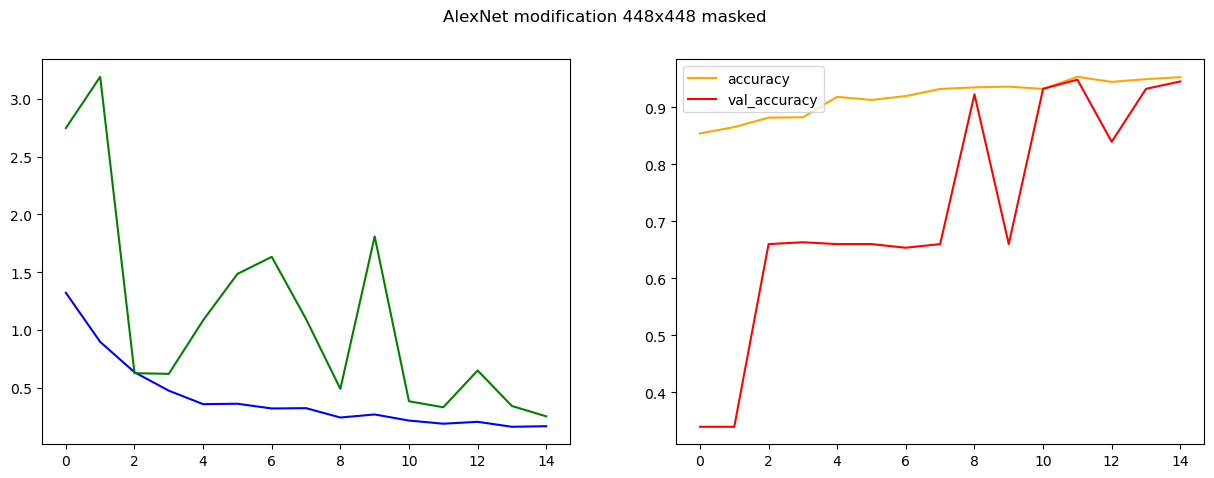

In [18]:
hist = AlexNet_MOD_448_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_448_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet modification 448x448 masked')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()

Epoch 1/15


2022-10-11 14:35:39.569715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.5656 - accuracy: 0.7931

2022-10-11 14:36:02.158639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 25s 237ms/step - loss: 1.5656 - accuracy: 0.7931 - val_loss: 0.7826 - val_accuracy: 0.3397
Epoch 2/15
91/91 [==============================] - 24s 233ms/step - loss: 0.9311 - accuracy: 0.8221 - val_loss: 0.9588 - val_accuracy: 0.3397
Epoch 3/15
91/91 [==============================] - 24s 234ms/step - loss: 0.6602 - accuracy: 0.8386 - val_loss: 0.9835 - val_accuracy: 0.6603
Epoch 4/15
91/91 [==============================] - 24s 234ms/step - loss: 0.5991 - accuracy: 0.8379 - val_loss: 0.8174 - val_accuracy: 0.6603
Epoch 5/15
91/91 [==============================] - 24s 233ms/step - loss: 0.5614 - accuracy: 0.8379 - val_loss: 1.0140 - val_accuracy: 0.6603
Epoch 6/15
91/91 [==============================] - 24s 233ms/step - loss: 0.5793 - accuracy: 0.8331 - val_loss: 1.0839 - val_accuracy: 0.6603
Epoch 7/15
91/91 [==============================] - 24s 233ms/step - loss: 0.4998 - accuracy: 0.8393 - val_loss: 1.5461 - val_accuracy: 0.6571
Epoch 8/15

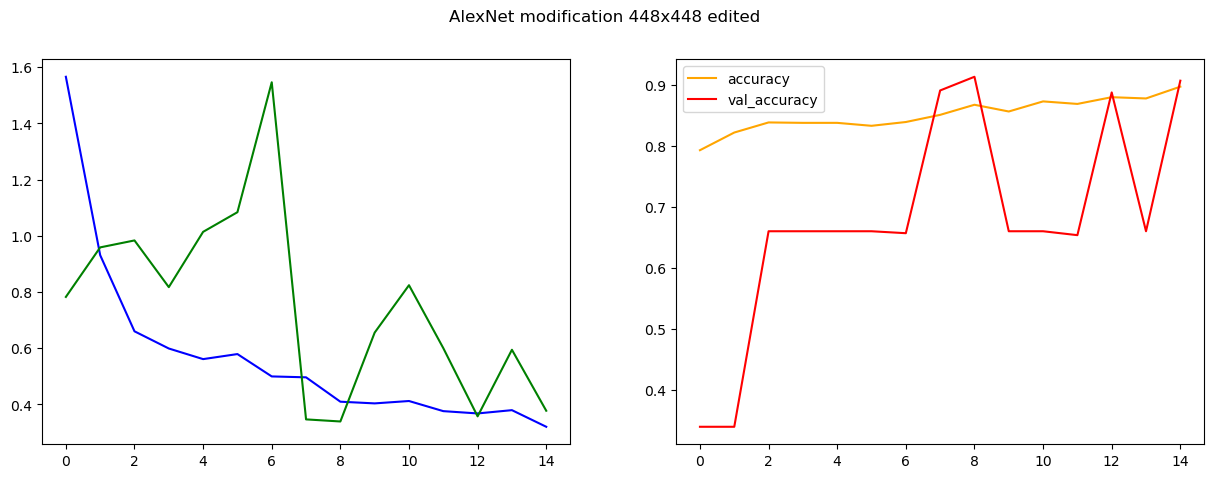

In [19]:
hist = AlexNet_MOD_448_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_448_edited.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet modification 448x448 edited')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()